Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

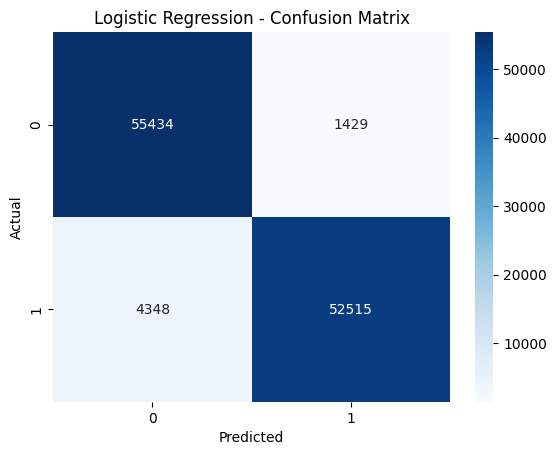


📊 Model: Random Forest
Accuracy: 0.9998768971035648
F1 Score: 0.9998769122560225
ROC-AUC: 0.9998768971035646

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



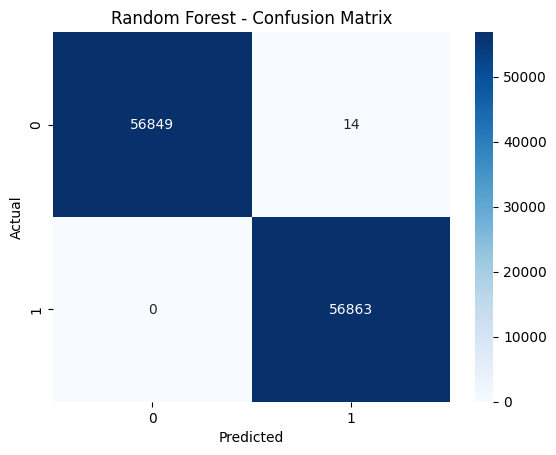


📊 Model: XGBoost
Accuracy: 0.999428450837979
F1 Score: 0.9994287773198232
ROC-AUC: 0.9994284508379789

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



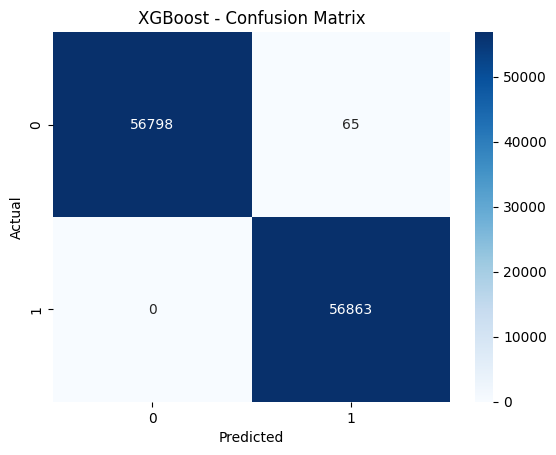


Model Comparison:
                      F1 Score   ROC-AUC
Logistic Regression  0.947864  0.949202
Random Forest        0.999877  0.999877
XGBoost              0.999429  0.999428

✅ Best model saved as best_fraud_model.pkl

Sample Prediction (1=Fraud, 0=Normal): 1


In [ ]:
#1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

#2. Load Dataset
df = pd.read_csv("/content/creditcard.csv")
print("Dataset shape:", df.shape)
print(df.head())

#3. Check Missing Values & Basic Info
print("\nMissing Values:\n", df.isnull().sum().sum())
print("\nClass Distribution:\n", df['Class'].value_counts())

#4. Data Preprocessing
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#5. Handle Imbalanced Data using SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)
print("\nAfter SMOTE:")
print(y_resampled.value_counts())

#6. Split Train-Test Data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

#7. Train Models

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

#8. Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n📊 Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

#9. Compare Models
models = {
    "Logistic Regression": [f1_score(y_test, y_pred_lr), roc_auc_score(y_test, y_pred_lr)],
    "Random Forest": [f1_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_rf)],
    "XGBoost": [f1_score(y_test, y_pred_xgb), roc_auc_score(y_test, y_pred_xgb)]
}

comparison = pd.DataFrame(models, index=["F1 Score", "ROC-AUC"]).T
print("\nModel Comparison:\n", comparison)

#10. Save Best Model
best_model = xgb  # (You can manually choose based on results)
joblib.dump(best_model, "best_fraud_model.pkl")
print("\n✅ Best model saved as best_fraud_model.pkl")

#11. Predict on new sample
# Example: predict on first row
sample = X_test[0].reshape(1, -1)
prediction = best_model.predict(sample)
print("\nSample Prediction (1=Fraud, 0=Normal):", prediction[0])
